<a href="https://colab.research.google.com/github/piyush1806/911-Calls-Data-Capstone-Project/blob/master/Copy_of_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
titanic = sns.load_dataset('titanic')

In [0]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [0]:
df = pd.read_csv('titanic.csv')

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [0]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

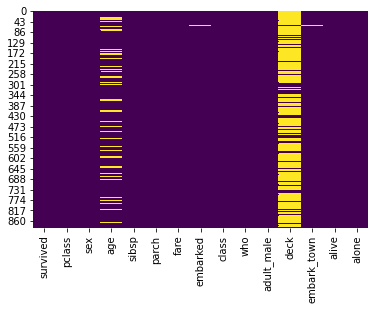

In [0]:
sns.heatmap(titanic.isnull(), cmap= 'viridis',cbar =False )

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


AttributeError: ignored

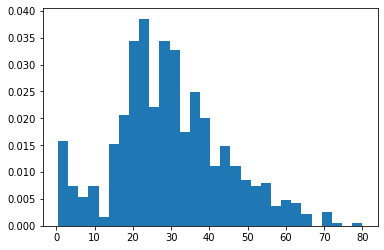

In [0]:
ax = plt.hist(titanic['age'], bins=30, figsize=(16,5),density=True, stacked=True)

In [0]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

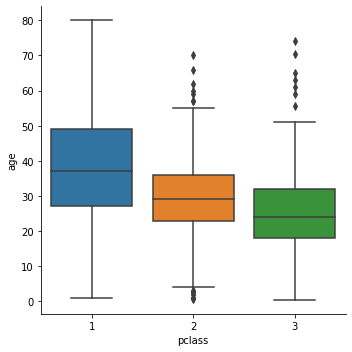

In [0]:
sns.catplot(x='pclass', y='age', data=titanic, kind='box')

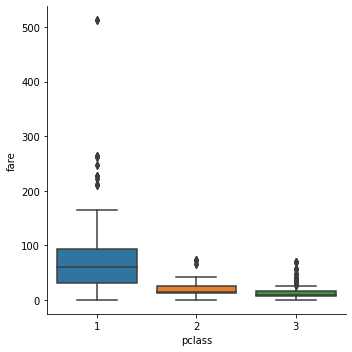

In [0]:
sns.catplot(x='pclass', y='fare', data=titanic, kind='box')

In [0]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [0]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [0]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [0]:
def impute_age(cols):
  age=cols[0]
  pclass =cols[1]

  if pd.isnull(age):
    if pclass==1:
      return titanic[titanic['pclass'] ==1]['age'].mean()
    elif pclass == 2:
      return titanic[titanic['pclass'] ==2]['age'].mean()
    elif pclass==3:
      return titanic[titanic['pclass'] ==3]['age'].mean()

  else:
      return age      

In [0]:
titanic['age'] =titanic[['age', 'pclass']].apply(impute_age, axis=1)

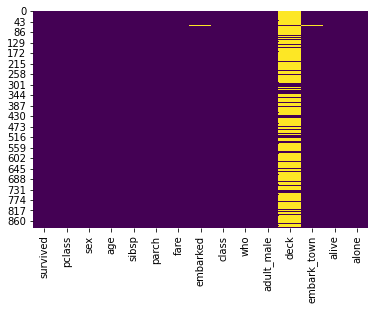

In [0]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [0]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace=True, axis=1)

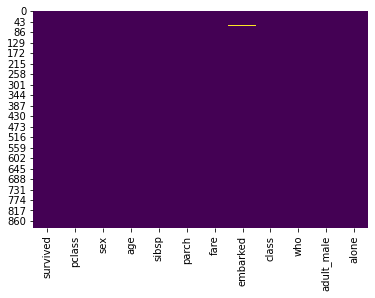

In [0]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [0]:
common_value='S'
titanic['embarked'].fillna(common_value, inplace=True)

In [0]:
titanic['embarked'].isnull().sum()

0

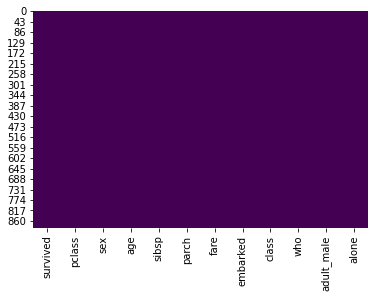

In [0]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [0]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,25.140620,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.233441,1,0,71.2833,C,First,woman,False,False
2,1,3,female,25.140620,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,38.233441,1,0,53.1000,S,First,woman,False,False
4,0,3,male,25.140620,0,0,8.0500,S,Third,man,True,True


In [0]:
titanic['fare'] =titanic['fare'].astype('int')
titanic['age'] =titanic['age'].astype('int')
titanic['pclass'] =titanic['pclass'].astype('int')

In [0]:
genders= {'male': 0, 'female': 1}
titanic['sex'] =titanic['sex'].map(genders)

In [0]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,NaN,25,1,0,7,S,Third,NaN,True,False
1,1,1,NaN,38,1,0,71,C,First,NaN,False,False
2,1,3,NaN,25,0,0,7,S,Third,NaN,False,True
3,1,1,NaN,38,1,0,53,S,First,NaN,False,False
4,0,3,NaN,25,0,0,8,S,Third,NaN,True,True


In [0]:
who= {'man': 0, 'women': 1, 'child': 2}
titanic['who'] =titanic['who'].map(who)

In [0]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,NaN,25,1,0,7,S,Third,NaN,True,False
1,1,1,NaN,38,1,0,71,C,First,NaN,False,False
2,1,3,NaN,25,0,0,7,S,Third,NaN,False,True
3,1,1,NaN,38,1,0,53,S,First,NaN,False,False
4,0,3,NaN,25,0,0,8,S,Third,NaN,True,True
